In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models # type: ignore
import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import accuracy_score
import cv2
import tensorflow.keras.backend as K # type: ignore

In [2]:
with open('./Data/A_Z Handwritten Data.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    num_lines = 372451
    
    for row in tqdm.tqdm(result, total=num_lines, desc='Reading CSV'):
        rows.append(row)

Reading CSV: 100%|██████████| 372451/372451 [01:55<00:00, 3226.64it/s] 


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '32', '215', '235', '43', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '130', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '14', '227', '255', '255', '107', '0', '0', '0', '0', '0', '0', '0', '0', '

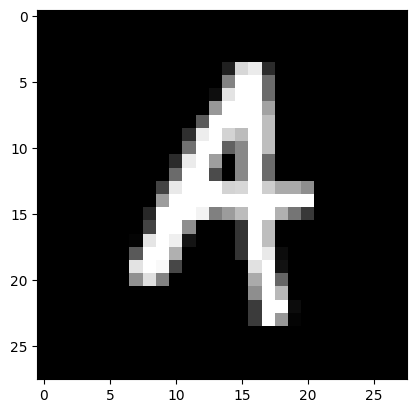

In [3]:
letter = rows[0]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)
print(letter)
plt.imshow(x,cmap='gray')


In [4]:
X = [] 
y = []
text = 0
count = 0
num_data_each_text = 1000
for letter in rows:
    if int(letter[0]) == text and count<num_data_each_text:
        x = np.array([int(j) for j in letter[1:]])
        x = x.reshape(28, 28)
        X.append(x)
        y.append(int(letter[0]))
        count +=1
    elif count>=num_data_each_text:
        text+=1
        count=0
    elif text>25:
        break

In [5]:
X = np.array(X)
y= np.array(y)

In [6]:
print(X.shape)

(26000, 28, 28)


In [7]:
# Xây dựng mô hình CNN
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Lớp tích chập 1
    model.add(
        layers.Conv2D(
            32,
            (5, 5),
            strides=1,
            padding="same",
            activation='relu',
            input_shape=input_shape,
        )
    )

    # Lớp tích chập 2
    model.add(
        layers.Conv2D(
            32, 
            (5, 5), 
            strides=1, 
            padding="same", 
            activation='relu',
        )
    )

    # Lớp Pooling 3
    model.add(
        layers.MaxPooling2D(
            (2, 2), 
            strides=2,
            )
        )

    # Lớp tích chập 4
    model.add(
        layers.Conv2D(
            64, 
            (3, 3), 
            strides=1, 
            padding="same", 
            activation='relu',
        )
    )

    # Lớp tích chập 5
    model.add(
        layers.Conv2D(
            64, 
            (3, 3), 
            strides=1, 
            padding="same",
            activation='relu', 
        )
    )

    # Lớp Pooling 6
    model.add(
        layers.MaxPooling2D(
            (2, 2), 
            strides=2
        )
    )
    
    # Lớp Dropout
    model.add(layers.Dropout(0.1))
    
    # Lớp Flatten 
    model.add(layers.Flatten())
    
    # Lớp kết nối đầy đủ 7
    model.add(
        layers.Dense(
            512, 
            activation="relu"
        )
    )
    # Lớp kết nối đầy đủ 8
    model.add(
        layers.Dense(
            num_classes, 
            activation="softmax"
        )
    )

    return model


# Kích thước ảnh đầu vào và số lớp phân loại 
input_shape = (
    28,
    28,
    1,
)
num_classes = 26  

model = models.Sequential()

# Xây dựng mô hình
model = build_cnn_model(input_shape, num_classes)

# Compile mô hình
model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

# In thông tin về kiến trúc mô hình
model.summary()

c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701,370 (6.49 MB)

 Trainable params: 1,701,370 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train, X_remaining, y_train, y_remaining = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.5, random_state=42
)

X_train = X_train.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

X_val = X_val.reshape(-1, 28, 28, 1)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

X_test = X_test.reshape(-1, 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [9]:
model.fit(X_train, y_train, epochs=10,batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 187s 115ms/step - accuracy: 0.6848 - loss: 1.5738 - val_accuracy: 0.9531 - val_loss: 0.1576
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.9560 - loss: 0.1530 - val_accuracy: 0.9638 - val_loss: 0.1454
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 68s 104ms/step - accuracy: 0.9680 - loss: 0.1091 - val_accuracy: 0.9615 - val_loss: 0.1332
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 72s 111ms/step - accuracy: 0.9744 - loss: 0.0787 - val_accuracy: 0.9623 - val_loss: 0.1409
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 73s 112ms/step - accuracy: 0.9755 - loss: 0.0724 - val_accuracy: 0.9673 - val_loss: 0.1348
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 67s 103ms/step - accuracy: 0.9809 - loss: 0.0582 - val_accuracy: 0.9588 - val_loss: 0.2112
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 77s 118ms/step - accuracy: 0.9790 - loss: 0.0641 - val_accuracy: 0.9635 - val_loss: 0.1551
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.9855 - loss: 

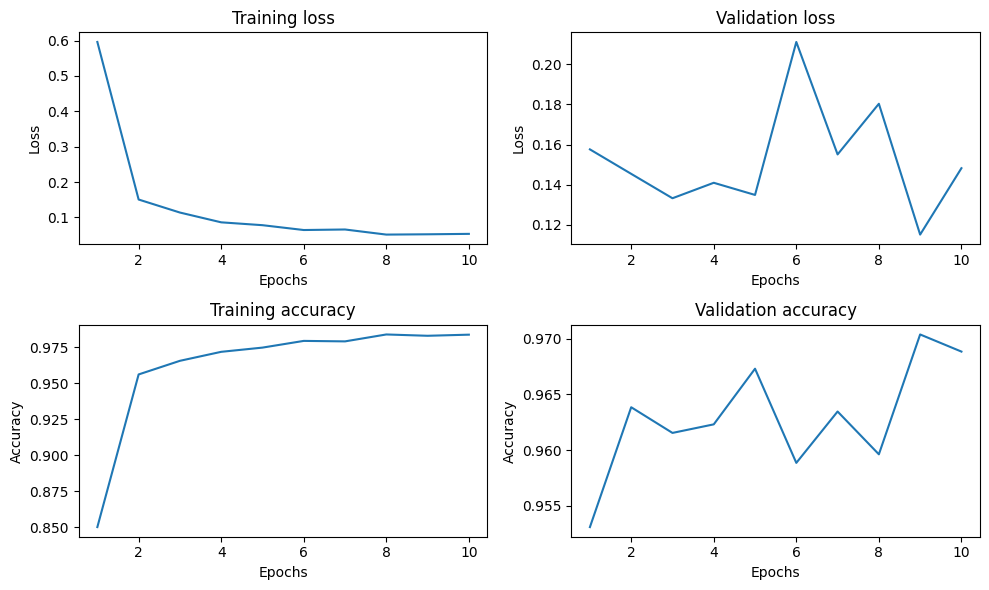

In [10]:
train_loss = model.history.history['loss']
train_accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']

# Vẽ đồ thị
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))

# Đồ thị mất mát
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, val_loss)
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Đồ thị độ chính xác
plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracy)
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracy)
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.tight_layout()
plt.show()

In [11]:
model.save('./PredictImage/static/models/model_detect_image.keras')
model.save('model_detect_image.keras')

In [12]:
model_trained = load_model("model_detect_image.keras")

In [13]:
y_pred = np.argmax(model_trained.predict(X_test), axis=-1)
# Tính toán accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy = ", accuracy)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Score: ", test_loss)
print("Test Accuracy: ", test_accuracy)

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Accuracy =  0.9684615384615385
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9636 - loss: 0.1496
Test Score:  0.13813826441764832
Test Accuracy:  0.9684615135192871


In [14]:
def otsu_thresholding(image):
    # Tính histogram của ảnh
    hist = np.histogram(image, bins=256, range=(0, 256))[0]

    total_pixels = image.size
    sum_total = np.sum(image)
    sum_b = 0
    weight_b = 0
    max_variance = 0
    optimal_threshold = 0

    for threshold in range(256):
        weight_f = np.sum(hist[:threshold]) / total_pixels
        weight_b = 1 - weight_f

        if weight_f == 0 or weight_b == 0:
            continue

        sum_f = np.sum(np.arange(threshold) * hist[:threshold])
        mean_f = sum_f / (weight_f * total_pixels)

        mean_b = (sum_total - sum_f) / (weight_b * total_pixels)

        variance_between = weight_f * weight_b * ((mean_f - mean_b) ** 2)

        if variance_between > max_variance:
            max_variance = variance_between
            optimal_threshold = threshold

    return optimal_threshold

In [15]:

def scale_to_0_255(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val) / (max_val - min_val)  # 0-1
    new_img *= 255
    return new_img


def my_canny(img, min_val, max_val, sobel_size=3, is_L2_gradient=False):
    # 2. Noise Reduction
    smooth_img = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=1, sigmaY=1)

    # 3. Finding Intensity Gradient of the Image
    Gx = cv2.Sobel(smooth_img, cv2.CV_64F, 1, 0, ksize=sobel_size)
    Gy = cv2.Sobel(smooth_img, cv2.CV_64F, 0, 1, ksize=sobel_size)

    if is_L2_gradient:
        edge_gradient = np.sqrt(Gx * Gx + Gy * Gy)
    else:
        edge_gradient = np.abs(Gx) + np.abs(Gy)
    angle = np.arctan2(Gy, Gx) * 180 / np.pi

    # round angle to 4 directions
    angle = np.abs(angle)
    angle[angle <= 22.5] = 0
    angle[angle >= 157.5] = 0
    angle[(angle > 22.5) * (angle < 67.5)] = 45
    angle[(angle >= 67.5) * (angle <= 112.5)] = 90
    angle[(angle > 112.5) * (angle <= 157.5)] = 135

    # 4. Non-maximum Suppression
    keep_mask = np.zeros(smooth_img.shape, np.uint8)
    for y in range(1, edge_gradient.shape[0] - 1):
        for x in range(1, edge_gradient.shape[1] - 1):
            area_grad_intensity = edge_gradient[
                y - 1 : y + 2, x - 1 : x + 2
            ]  # 3x3 area
            area_angle = angle[y - 1 : y + 2, x - 1 : x + 2]  # 3x3 area
            current_angle = area_angle[1, 1]
            current_grad_intensity = area_grad_intensity[1, 1]

            if current_angle == 0:
                if current_grad_intensity > max(
                    area_grad_intensity[1, 0], area_grad_intensity[1, 2]
                ):
                    keep_mask[y, x] = 255
                else:
                    edge_gradient[y, x] = 0
            elif current_angle == 45:
                if current_grad_intensity > max(
                    area_grad_intensity[2, 0], area_grad_intensity[0, 2]
                ):
                    keep_mask[y, x] = 255
                else:
                    edge_gradient[y, x] = 0
            elif current_angle == 90:
                if current_grad_intensity > max(
                    area_grad_intensity[0, 1], area_grad_intensity[2, 1]
                ):
                    keep_mask[y, x] = 255
                else:
                    edge_gradient[y, x] = 0
            elif current_angle == 135:
                if current_grad_intensity > max(
                    area_grad_intensity[0, 0], area_grad_intensity[2, 2]
                ):
                    keep_mask[y, x] = 255
                else:
                    edge_gradient[y, x] = 0

    # 5. Hysteresis Thresholding
    canny_mask = np.zeros(smooth_img.shape, dtype=np.uint8)
    canny_mask[(keep_mask > 0) * (edge_gradient > min_val)] = 255

    return np.uint8(scale_to_0_255(canny_mask))

In [16]:
characters_list = [chr(i) for i in range(ord('A'), ord('Z') + 1)]

In [17]:
def detect_characters(img):
    image_gray = cv2.resize(img, (28, 28))
    print("Ảnh nhị phân hóa")
    threshold_value = otsu_thresholding(image_gray)
    binary_image = (image_gray > threshold_value).astype(
        np.uint8
    )  # > threshold = 1 else = 0
    binary_image[binary_image == 1] = 255
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.show()

    image_text = cv2.resize(binary_image, (28, 28))
    result_pred = np.argmax(
        model_trained.predict(image_text.reshape(-1, 28, 28, 1)), axis=-1
    )
    return characters_list[result_pred[0]]

In [18]:
from PIL import Image, ImageDraw
import os
import random

In [19]:
indexes = random.sample(range(0, len(rows)), 50)
count = 0
for i in indexes:
    image_data = np.array([int(j) for j in rows[i][1:]]).reshape(28, 28)

    # Chuyển mảng numpy thành đối tượng Image của Pillow
    image = Image.fromarray(image_data.astype("uint8"))

    # Lưu hình ảnh thành file ảnh
    image.save(f"Data/image_test/image_test_{count}.png")
    count += 1

In [20]:
# Đường dẫn tới thư mục chứa ảnh
folder_path = './Data/image_test'

file_list = os.listdir(folder_path)

images = []

for image_file in [file for file in os.listdir(folder_path) if file.lower().endswith(('.png'))]:
    image_path = os.path.join(folder_path, image_file)
    images.append(np.array(Image.open(image_path)))
    
print(f'Đã đọc {len(images)} file ảnh.')

Đã đọc 50 file ảnh.


IMAGE TEST


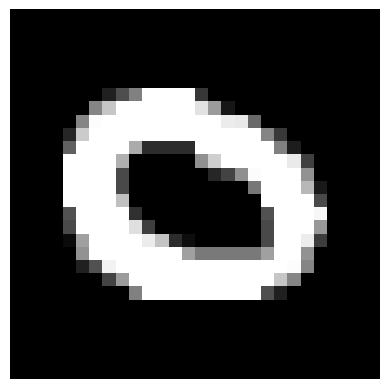

Ảnh nhị phân hóa


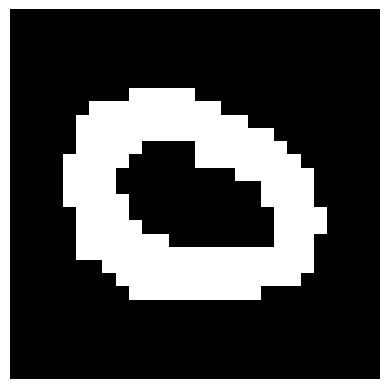

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Kết quả nhận dạng:  O


In [21]:
image = images[0]
print("IMAGE TEST")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

print("Kết quả nhận dạng: ", detect_characters(image))

In [ ]:

print("IMAGE TEST")
image = np.array([int(j) for j in rows[14789][1:]]).reshape(28, 28)

plt.imshow(image, cmap="gray")

plt.axis("off")

plt.show()

print("Kết quả nhận dạng: ", detect_characters(image))